<a href="https://colab.research.google.com/github/yeonnex/Colab/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코로나 : 시각화를 통한 인사이트 도출

## 1. 준비.

In [ ]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지
import warnings

In [ ]:
 pd.set_option("precision", 4)

In [ ]:
# 성가신 경고를 꺼준다.
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅데이터/별첨 2_DACON_코로나 데이터 분석_최종/data/PatientInfo.csv')

In [ ]:
df1.shape

(4004, 18)

In [ ]:
df1.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

## 2. 기초적인 탐색

In [ ]:
# 중복된 환자 ID는 없어보인다. 

# 데이터의 개수
print("데이터 행의 수 = {}".format(len(df1))) # 또는 df1.shape[0]
# 고유한 id의 개수
print("고유한 환자 ID 수 = {}".format(df1.patient_id.nunique()))

데이터 행의 수 = 4004
고유한 환자 ID 수 = 4004


In [ ]:
# 결측치 집계
print(df1.isnull().sum()) # 컬럼별로 결측치를 집계해준다.
print("="*30)
print("결측치 총 개수 = ", df1.isnull().sum().sum()) # 결측치 총합 집계

patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64
결측치 총 개수 =  27910


In [ ]:
df1.sex.nunique()

2

In [ ]:
df1.isnull()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False
4000,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,False
4001,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False
4002,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False


In [ ]:
df1.isnull()*1 # 1을 곱해줌으로써 행렬 형태로 변환되게 되었다!

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0
4000,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0
4001,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0
4002,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0


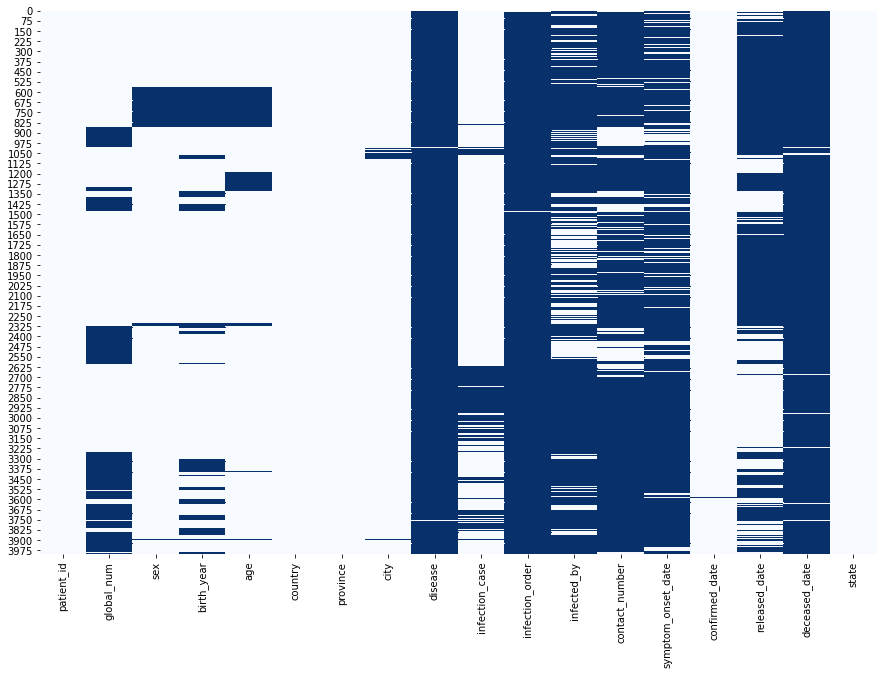

In [ ]:
# 결측치를 시각화해본다
plt.figure(figsize=(15, 10)) # 가로 15, 세로 10
sns.heatmap(df1.isnull(), cmap='Blues', cbar=False) # cbar=True : 1은 가장 진한 색, 0은 하얀색
plt.show()
# 이 행렬에서는 0과 1밖에 없으므로, 결과가 극명하게 나옴

# 기저질환이나, 사망일 컬럼의 경우 거의 모든 값이 결측치...
# 그러나 인사이트를 도출하는 것이 목적이기 때문에, 결측치를 막 적극적으로 메꾸지는 않겠음.

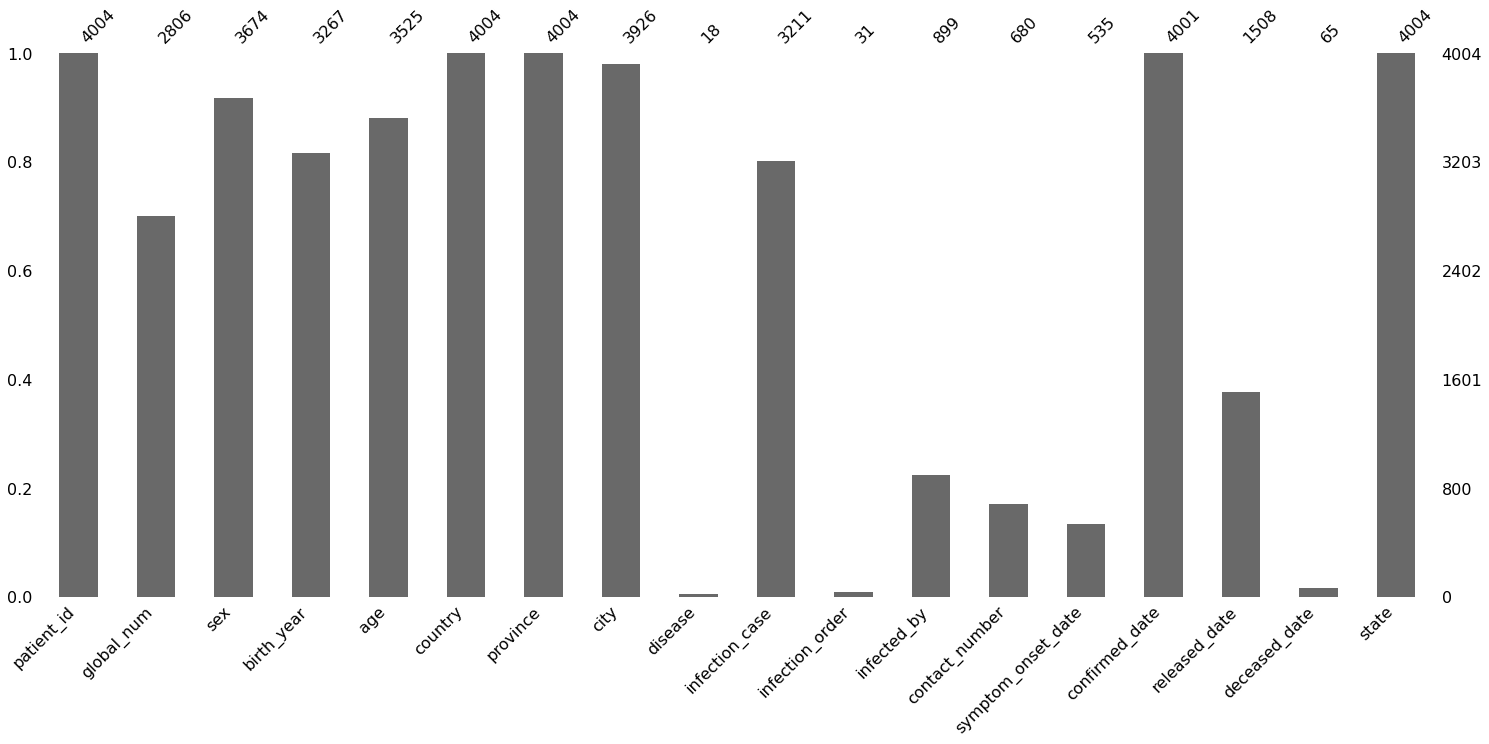

In [ ]:
# 이 그래프가 더 직관적임
msno.bar(df=df1.iloc[:, :])

In [ ]:
# 성별 집계를 해보도록 하겠습니다.
df1.groupby('sex').size()

sex
female    2021
male      1653
dtype: int64

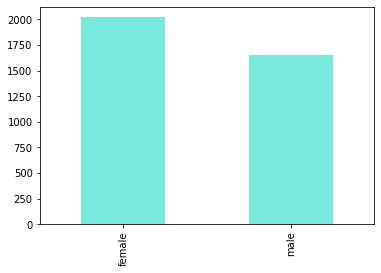

In [ ]:
# 성별 집계를 해보도록 하겠습니다.
sex_counts = df1.sex.value_counts()
sex_counts = sex_counts.sort_values(ascending=False) # 대 -> 소 순서로 정렬
sex_counts.plot.bar(color='turquoise', alpha=0.7)
plt.show()

In [ ]:
# 연령대별로 집계해본다
df1.age
# object타입임... 나이'대'를 뜻하는 문자인 s가 붙어서 데이터가 이루어져있음

0       50s
1       30s
2       50s
3       20s
4       20s
       ... 
3999    20s
4000    30s
4001    20s
4002    10s
4003    30s
Name: age, Length: 4004, dtype: object

In [ ]:
# s를 떼어보도록 하겠습니다
# Series 함수인 str.replace 사용!
df1.age.str.replace('s', '', regex=True)
df1.age = df1.age.str.replace('s', '', regex=True) # 다시 대입하여 항구적으로 만들어준다

In [ ]:
age_count = df1.age.value_counts()
age_count

20     860
50     625
30     494
40     483
60     423
70     210
80     162
10     160
0       60
90      47
100      1
Name: age, dtype: int64

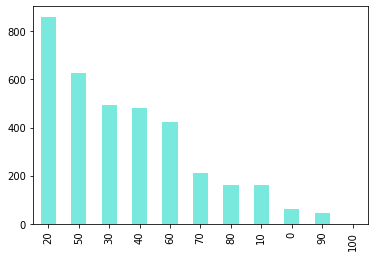

In [ ]:
# 연령대별 환자수. 20대가 가장 많음
age_count.plot.bar(color='turquoise', alpha=0.7)

In [ ]:
# 지역별 집계
df1.province.value_counts()

Gyeongsangbuk-do     1245
Seoul                 863
Gyeonggi-do           853
Incheon               232
Chungcheongnam-do     146
Busan                 144
Gyeongsangnam-do      122
Daegu                  63
Gangwon-do             55
Ulsan                  52
Chungcheongbuk-do      52
Sejong                 47
Daejeon                46
Gwangju                30
Jeollabuk-do           21
Jeollanam-do           19
Jeju-do                14
Name: province, dtype: int64

In [ ]:
# 국적별 집계
print("고유한 나라의 개수= ", df1.country.nunique())
print("="*30)
print(df1.country.value_counts())

고유한 나라의 개수=  15
Korea             3974
China               11
United States        6
Thailand             2
Switzerland          1
Bangladesh           1
Canada               1
United Kingdom       1
Foreign              1
Germany              1
Mongolia             1
Vietnam              1
Spain                1
Indonesia            1
France               1
Name: country, dtype: int64


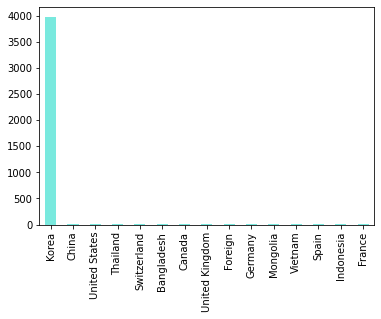

In [ ]:
country_counts = df1.country.value_counts()
country_counts.plot.bar(color='turquoise', alpha=0.7)

In [ ]:
# 코리아가 단연 많습니다.
# 이렇게 생각해보죠. 국내인 대비 외국인
# 그럼 어떻게 집계할까요

df1.country == 'Korea'

0        True
1        True
2        True
3        True
4        True
        ...  
3999     True
4000     True
4001     True
4002    False
4003     True
Name: country, Length: 4004, dtype: bool

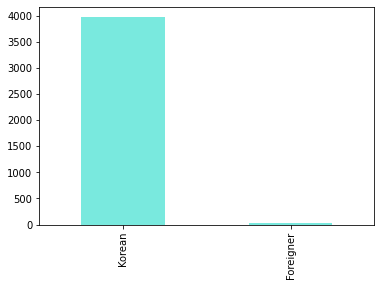

In [ ]:
country_counts = (df1.country=='Korea').value_counts()
country_counts.index = ['Korean', "Foreigner"]
country_counts.plot.bar(color='turquoise', alpha=0.7)

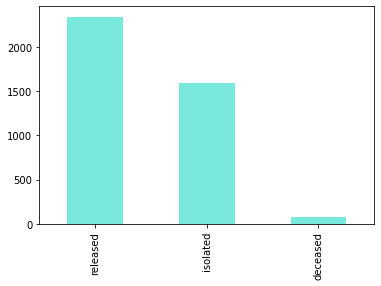

In [ ]:
# 현재 상태 별로 집계한다
state_counts = df1.state.value_counts()
state_counts.plot.bar(color='pink', alpha=0.7)
# 퇴원이 가장 많고, 그 다음이 격리중, 그다음 사망

In [ ]:
# 기저질환 여부별로 집계한다.
df1.disease.count()

# 기저질환은, 결측치가 아닌 것이 18개밖에 없음..
# 기저질환 가지고서는 정상값의 수가 절대적으로 부족해서 분석이 불가능함
# 기저질환 가지고서는 분석을 하지 않겠어요!

18

변수를 두개씩 조합해서 분석해보자

In [ ]:
# 연령대와 성별을 조합해서 시각화해본다.

# 연령대별 성
df1.sex
df1.age
ct = pd.crosstab(df1.age,df1.sex)
print(ct)
ct["total"] = ct.male + ct.female
ct.sort_values(by='total', ascending=False)

sex  female  male
age              
0        26    34
10       64    96
100       1     0
20      442   417
30      235   259
40      290   193
50      376   249
60      236   187
70      129    81
80      110    52
90       31    16


sex,female,male,total
age,,,
20,442,417,859
50,376,249,625
30,235,259,494
40,290,193,483
60,236,187,423
70,129,81,210
80,110,52,162
10,64,96,160
0,26,34,60


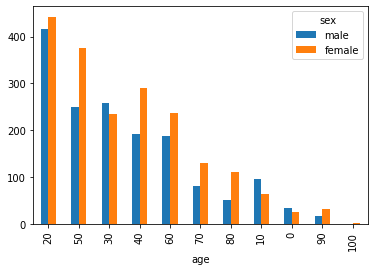

In [ ]:
# 정렬은 total로 하되, 실제 가져오는 것은 male과 female로 시각화해본다
ct.sort_values(by='total', ascending=False)[["male", "female"]].plot.bar()

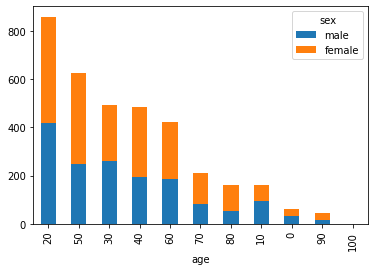

In [ ]:
ct.sort_values(by='total', ascending=False)[["male", "female"]].plot.bar(stacked = True)
# 연령대별 성별 시각화!
# 두 개의 변수를 활용!!

In [ ]:
# 연령대별 사망비율
ct = pd.crosstab(df1.age, df1.state == 'deceased')

# 컬럼 이름 바꾸기 True,False -> alive, deceased
# ct.rename(columns={False:"alive", True:"deceased"}, inplace=True)
ct.columns = ["alive", "deceased"]
ct

,alive,deceased
age,,
0,60,0
10,160,0
100,1,0
20,860,0
30,493,1
40,481,2
50,618,7
60,411,12
70,190,20


In [ ]:
# 사망률을 구해보자.
ct["mortality"] = ct.deceased / (ct.deceased + ct.alive)
ct

,alive,deceased,mortality
age,,,
0,60,0,0.0000
10,160,0,0.0000
100,1,0,0.0000
20,860,0,0.0000
30,493,1,0.0020
40,481,2,0.0041
50,618,7,0.0112
60,411,12,0.0284
70,190,20,0.0952


In [ ]:
# 사망률 컬럼만 가져오기
ct.sort_values(by="mortality", ascending=False)["mortality"]

age
80     0.1543
90     0.1489
70     0.0952
60     0.0284
50     0.0112
40     0.0041
30     0.0020
0      0.0000
10     0.0000
100    0.0000
20     0.0000
Name: mortality, dtype: float64

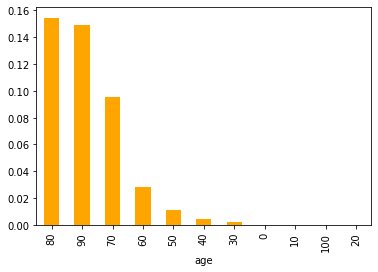

In [ ]:
ct.sort_values(by="mortality", ascending=False)["mortality"].plot.bar(color='orange')
plt.show()

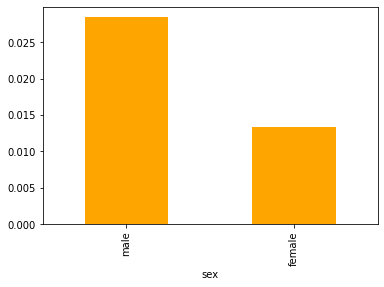

In [ ]:
# 성별 사망비율 (연령대별 사망비율에서 변수를 age -> sex 로 살짝 바꾸기만 하면 똑같음!)
ct = pd.crosstab(df1.sex, df1.state == 'deceased')

# 컬럼 이름 바꾸기 True,False -> alive, deceased
# ct.rename(columns={False:"alive", True:"deceased"}, inplace=True)
ct.columns = ["alive", "deceased"]
ct

# 사망률을 구해보자.
ct["mortality"] = ct.deceased / (ct.deceased + ct.alive)
ct
# 사망률 컬럼만 가져오기
ct.sort_values(by="mortality", ascending=False)["mortality"]

ct.sort_values(by="mortality", ascending=False)["mortality"].plot.bar(color='orange')
plt.show()

# 남성은 3% 정도 사망, 여성은 1.3% 정도 사망